In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Logistic regression and IRIS Flower Classification

The classifier we used in Week 8.

Please check Week8_Tutorial_Logistic Regression.pdf on LEO for more details.

In [ ]:
# Preparea training data
from sklearn.datasets import load_iris
iris = load_iris()

X = iris["data"][:,(2,3)] # Use pedal length, pedal width as features
y = (iris["target"] == 2).astype(np.int64)  # 1 if Iris virginica, else 0
# y = (iris["target"] == 0).astype(np.int) # 1 if Iris Setosa, else 0

In [ ]:
# Train a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [ ]:
# Make new predictions
X_new = [[2, 0.5]] # pedal length and pedal width of a new sample
y_LR = log_reg.predict(X_new)
print('The predicted label is: ', y_LR)

The predicted label is:  [0]


In [ ]:
y_LR_proba = log_reg.predict_proba(X_new) # Predict probability
print('The predicted probability of class 0/1 are: \n', y_LR_proba)

The predicted probability of class 0/1 are: 
 [[9.99979603e-01 2.03970461e-05]]


The probability of being Iris Setosa is 0.89. Thus the model predicts that it is Setosa.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Perceptron and IRIS Flower Classification

In [ ]:
# Preparea training data
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int64) # 1 if Iris Setosa, else 0

In [ ]:
# Train a Perceptron Classifier
from sklearn.linear_model import Perceptron
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [ ]:
# Make new predictions
X_new = [[2, 0.5]]
y_Perceptron = per_clf.predict(X_new)
y_Perceptron

array([1])

### Visualize the decision boundary

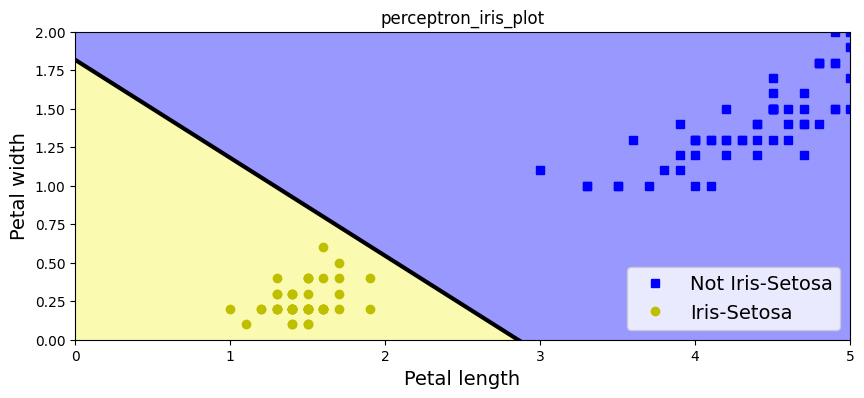

In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.title("perceptron_iris_plot")
plt.show()

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [ ]:
# Preparea training data
from sklearn.datasets import load_iris
iris = load_iris()

X = iris["data"]
y = iris["target"]

In [ ]:
X.shape

(150, 4)

In [ ]:
X[0]

array([5.1, 3.5, 1.4, 0.2])